In [11]:
import numpy as np, pandas as pd
# import matplotlib.pyplot as plt, seaborn as sns
from tqdm import tqdm
import numpy

### Data Loading

In [3]:
data = pd.read_csv("data/tracks.csv")

In [61]:
data.drop(columns=['key', 'id', 'id_artists'], inplace=True)
data.dropna(inplace=True)
data['release_date'] = data['release_date'].map(lambda x: int(x[:4]))

In [62]:
data1950 = data[data['release_date']<1950].sample(5000)
data2000 = data[data['release_date']>=1950 & (data['release_date']<2000)].sample(10000)
data2021 = data[data['release_date']>=2000].sample(30000)
data = pd.concat([data1950, data2000, data2021], axis=0, ignore_index=True)

In [22]:
def normalize_column(df_col):
    max_d = df_col.max()
    min_d = df_col.min()
    return (df_col - min_d)/(max_d - min_d)

<AxesSubplot:>

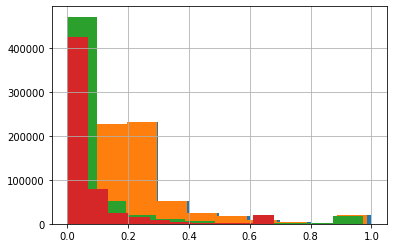

In [32]:
normalize_column(pd.Series(np.sqrt(data['speechiness']))).hist()

pd.Series(np.sqrt(data['speechiness'])).hist()
data['speechiness'].hist()


In [64]:
def normalize_column(df_col):
    max_d = df_col.max()
    min_d = df_col.min()
    return (df_col - min_d)/(max_d - min_d)

data1 = data.copy()
num_types = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
num = data1.select_dtypes(include=num_types)
        
for col in num.columns:
    normalize_column(data1, col)

In [65]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=15)
cat = km.fit_predict(num)
data1['cat'] = cat
normalize_column(data1, 'cat')

In [32]:
def normalize_column(df_col):
    max_d = df_col.max()
    min_d = ddf_col.min()
    return (df_col - min_d)/(max_d - min_d)

class SpotifyRecommender():
    def __init__(self, rec_data):
        self.rec_data_ = rec_data
        for col_name in self.rec_data_.columns:
            if col_name not in ['id', 'name', 'artists', 'id_artists', 'release_date', 'key']:
                self.rec_data_[col_name] = normalize_column(self.rec_data_[col_name])

    
    def change_data(self, rec_data):
        self.rec_data_ = rec_data
        
    
    def get_recommendations(self, song_name, amount=1):
        distances = []
        #choosing the data for our song
        song = self.rec_data_[(self.rec_data_.name.str.lower() == song_name.lower())].head(1).values[0]
        #dropping the data with our song
        res_data = self.rec_data_[self.rec_data_.name.str.lower() != song_name.lower()]
        for r_song in tqdm(res_data.values):
            dist = 0
            for col, col_name in enumerate(data.columns):
                # non-numerical columns
                if col_name not in ['id', 'name', 'artists', 'id_artists', 'release_date', 'key']:
                    #calculating the manhettan distances for each numerical feature
                    dist = dist + np.absolute(float(song[col]) - float(r_song[col]))
            distances.append(dist)
        res_data['distance'] = distances
        
        #sorting our data to be ascending by 'distance' feature
        res_data = res_data.sort_values('distance')
        return show_final_df(res_data[:amount])

In [67]:
data['cat'] = data1['cat']

In [68]:
data.to_csv('data/tracks5.csv', index=None)

In [15]:
data = pd.read_csv("data/tracks5.csv")

In [29]:
# %%time
# aaa = get_all_artists(data['artists'].unique())
# pd.Series(aaa).to_csv('data/artists.csv', index=None)
# aaa = data['name']
# pd.Series(aaa).to_csv('data/song_names.csv', index=None)

Wall time: 7.17 s
